In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Text(0.5, 1.0, 'Labels returned by KMeans')

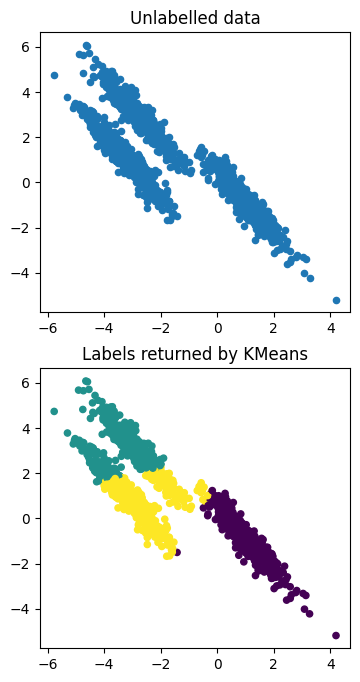

In [2]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

plt.figure(figsize = (4,8))
plt.subplot(211)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=20)
plt.title("Unlabelled data")

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(212)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=y_pred, s=20)
plt.title("Labels returned by KMeans")

**Spectral Clustering:**
- Step 1: Form a similarity graph with the adjacency matrix.
Idea behind this is that we compute the pairwise similarity between all points in the dataset. i.e. take the exponent of the euclidean distance between points. Points with high distance between them result in low similarity scores and the reverse is true.

In [4]:
from scipy.spatial import distance

In [5]:
rbf_param = 7.6

In [9]:
# Find M:
K = np.exp(-rbf_param * distance.cdist(X_aniso, X_aniso, metric='sqeuclidean'))

In [10]:
D = K.sum(axis=1)
D = np.sqrt(1/D)

In [11]:
D.shape

(1500,)

In [18]:
D[:,np.newaxis].shape

(1500, 1)

In [21]:
M = np.multiply(D[np.newaxis,:],np.multiply(K, D[:,np.newaxis]))

In [22]:
M.shape

(1500, 1500)

M is the normalised adjacency matrix.
- The normalised adjacency matrix adjusts the raw adjacency matrix to account for the degree (or connectivity) of each node, making it easier to identify clusters by balancing the influcence of nodes with different numbers of connections. 

**Step 2: Eigenvalue decomposition**

In [23]:
from scipy import linalg
from sklearn.preprocessing import normalize

In [24]:
U, Sigma, _ = linalg.svd(M, full_matrices=False, lapack_driver="gesvd")

In [25]:
Usubset = U[:, 0:3]

**Perform KMeans:**

In [26]:
y_pred_sc = KMeans(n_clusters = 3).fit_predict(normalize(Usubset))

Text(0.5, 1.0, 'Labels returned by Spectral Clustering')

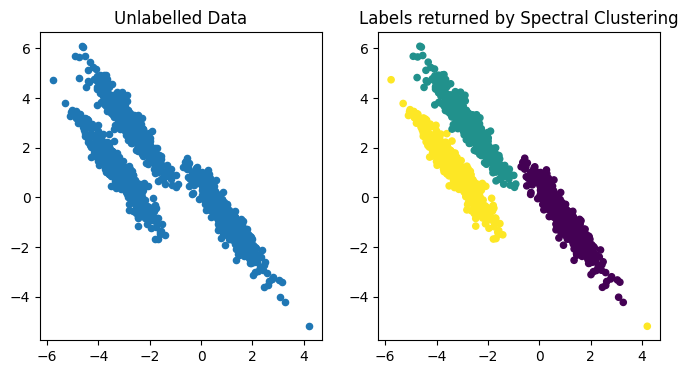

In [28]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=20)
plt.title("Unlabelled Data")

plt.subplot(122)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred_sc, s=20)
plt.title("Labels returned by Spectral Clustering")